# Assignment

###In this assignment, we will design the drive system for a transport belt. The drive will be powered by a geared electromotor and a chain transmission. Here are the initial specifications:###

Speed of the motor: $n_3 = 1500 \: rpm$

Team specific requirements:
- Speed of chain: $v_1 = 15 \: km/h$
- Sprocket diameter: $d_1 = 450 \: mm$
- Power needed to move the carts:  $P_1 = 4.4 \: kW$
-----

In [7]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import rm_python_lib.MechDesign.Helpers as HM
# UM.PrintAvailableUnits()

from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_
import rm_python_lib.MechDesign.Units.UnitMethods as UM
UM.PrintAvailableUnits() # I recolated this line from above to here
import rm_python_lib.MechDesign.RnM as RnM
belt = RnM.Belt()
gears = RnM.GearDesign()
chain = RnM.Chain()
B1 = RnM.Shaft()
B2 = RnM.Shaft()
connections = RnM.ShaftConnection()

['kg_', 'm_', 'dm_', 'cm_', 'mm_', 'mu_m_', 'N_', 'rpm_', 's_', 'W_', 'Pa_', 'deg_', 'h_']


## Sesion 1



### P T n Calculations
First lets insert known data to the variables:

In [8]:
# Given values
belt.n_1 = 1500*rpm_  # Speed of motor
chain.v = 15/3.6*m_/s_  # Speed of sprocket 1
chain.d_1 = UM.All_to_SI(450*mm_)  # Diameter of sprocket 1
chain.P_2 = 4.4*1000*W_  # Power needed at sprocket 1
gears.beta_1 =0    # teeth are straight cut 
gears.beta_2 = 0    # teeth are straight cut 



Having in mind the given data now it is possible to calculate the parameters for the shaft $B2$. Also it is important to mention that the shafts are numbered from left to right. Meaning that motor shaft data is marked with a "$_1$", $B1$ shaft with and index "$_2$" and the $B2$ shaft with and index "$_3$". Since now we assume ideal conditions to compute aproximate power, all three shafts will have the same power because of the conservation of energy.

In [9]:
chain.T_1 = chain.P_2/(2*chain.v/chain.d_1)  # Torque on sprocket 1

w_1 = 2*chain.v/chain.d_1             # Angular velocity of sprocket 1
chain.n_1 = UM.RemoveUnits(w_1/(2*sp.pi)*60*rpm_)*rpm_  # Rotational speed of sprocket 1

belt.P = chain.P_2
gears.P_1 = chain.P_2

t=HM.EqPrint('P_1', chain.P_2)
t=HM.EqPrint('P_2', chain.P_2)
t=HM.EqPrint('P_3', chain.P_2)
t=HM.EqPrint('T_3', chain.T_1.evalf())
t=HM.EqPrint('n_3', chain.n_1.evalf())

Eq(P_1, 4400.0*W_)

Eq(P_2, 4400.0*W_)

Eq(P_3, 4400.0*W_)

Eq(T_3, 237.6*W_*s_)

Eq(n_3, 176.8*rpm_)

In [10]:
import math
i_tot = chain.n_1/belt.n_1
t=HM.EqPrint('i_tot',i_tot)


belt.n_2 = math.sqrt(UM.RemoveUnits(3*chain.n_1*belt.n_1/5))
t = HM.EqPrint('n_2',belt.n_2*rpm_) 

belt.i = UM.RemoveUnits(belt.n_2/belt.n_1)
t = HM.EqPrint('i_r',belt.i)

gears.omega_1 = UM.rpm_to_rad_s(belt.n_2*rpm_)
gears.omega_2 = UM.rpm_to_rad_s(chain.n_1)

gears.i = gears.omega_2/gears.omega_1
t = HM.EqPrint('i_twk', gears.i)



Eq(i_tot, 0.1179)

Eq(n_2, 398.9*rpm_)

Eq(i_r, 0.266)

Eq(i_twk, 0.4433)

Since now all the rotational speeds are known the torques can be computed.

In [11]:
belt.T_1 = belt.P/ UM.rpm_to_rad_s(belt.n_1)

belt.T_2 = gears.P_1/ gears.omega_1
t = HM.EqPrint('T_1', belt.T_1)
t = HM.EqPrint('T_2', belt.T_2)

Eq(T_1, 28.01*W_*s_)

Eq(T_2, 105.3*W_*s_)

### Motor selection

# Selection Criteria

### Based on the provided data of desired Power output = 4.4kW, and with the efficiency n (= my assumption = 0.9), we can find that the motor desired power is around 4.9kW. Looking at the "Power P in kW for a synchronous rotational speed, 1500 rpm-1 column, we notice there is no 4.9kW value. Therefore we need to take the uper suitable value, 5.5kW. And hence the selected motor is 132S. It has a shaft diameter of 38mm (needed for the key calculation).

![Motor Selection Table 16-21](table16-21.png)


### Finding the right Ka
In this section, Ka and the efficiency of the motor is calculated based on some design assumptions.
------------

![Table_3_5b](Table_3_5b.png)

Assuming a medium-duty induction motor (moderate start/stop frequency), continuous full-load operation with occasional mild shocks, a drivetrain susceptible to gear pitting, and 20 hours/day operation, the preliminary estimate for the control/amplifier constant is 𝐾𝐴=1.9. In this context 𝐾𝐴 represents the gain between the control command and stator voltage (i.e. Vs=KA⋅Vcontrol).A higher KA increases available stator voltage and therefore torque for a given controller output, but it also increases stator currents and associated copper and iron losses (losses scale nonlinearly with current). The operating conditions (frequent moderate starts, shocks and gear pitting) will reduce overall mechanical efficiency and increase vibration-related losses and bearing wear, so the effective system efficiency will be lower than nameplate motor efficiency. This estimated 𝐾𝐴 should therefore be validated experimentally and may need to be derated to limit thermal stress and prolong gearbox and bearing life.

### Key calculations


When the shaft transfers torque (T 
eq), the key applies a force, and that force results in surface pressure (p) on the contact area.
Graph between torque and required length

(efficiency needed, to be cohesion with Part 1, n = 0.9)
-> Pmotor = 4.4/0.9 = 4.889kw (In the motor selection, n is assumped to be 5.5)
Tnom = Pmotor*60 / (2pi * 1500 min-1) = 35.01Nm


p (l) = 2*Ka*Tnom *Kv/(d*h'*l8*n*phi)

Ka = 1.9, Tnom = 35.01, Kv = 1, n=1, phi = 1, d = 38mm, h' = 0.45*8 mm

brittel: 
p_hat = Kt*RmN/Sb
Kt = 1
rmN = 800, Sb = 2

ductile: p_hat = Kt*ReN/Sf
Kt = 1, ReN = 550, Sf = 1.5

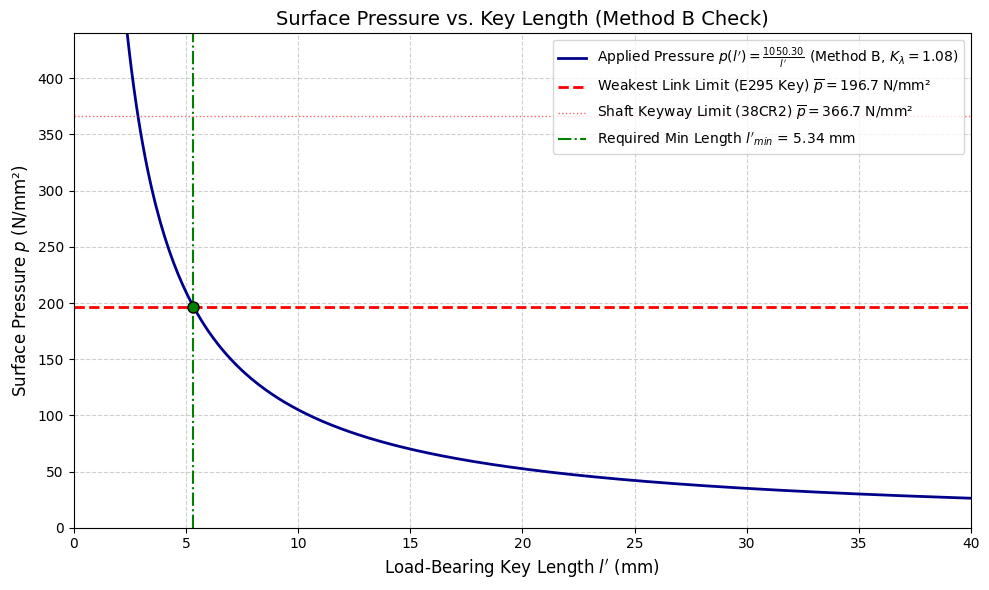

--- Key Design Summary ---
1. Governing Pressure Constant (C_plot / l'): 1050.30 N/mm²·mm
2. Weakest Link Allowable Stress (p_hat_E295): 196.67 N/mm^2
3. Calculated Minimum Required Length (l'_min): 5.34 mm
4. Chosen Standard Length (l): 36 mm (Used for final dimensioning)


In [14]:
# Torques and Factors (Dimensionless or N.m):
T_nom_Nm = 35.01 # N.m (Nominal Torque: 5.5 kW @ 1500 rpm)
K_A = 1.9        # Application Factor (User provided value)
K_lambda = 1.08  # Load Distribution Factor (Method B Iteration result)

# Geometry (mm):
d_mm = 38.0        # Shaft diameter
h_prime_mm = 3.6   # Bearing key height (h' = 0.45 * 8mm standard key)

# --- 2. Define Material Properties and Limits (N/mm^2) ---

# Material 1 (Shaft Keyway - 38CR2)
R_e_38Cr2 = 550.0  # Yield Strength for 38CR2
S_f_ductile = 1.5  # Safety factor for ductile yield check

# Material 2 (Key - E295) - This is the weakest link for Crushing (yields before 38CR2)
R_e_E295 = 295.0   # Yield Strength for E295 (Standard key material)

# Material 3 (Brittle Check Limit - for visual comparison)
R_m_38Cr2 = 800.0  # Tensile Strength for 38CR2 (for S_B check only)
S_b_brittle = 2.0  # Safety factor for brittle check

# Calculate Permissible Stresses (p_hat):
p_hat_38Cr2 = R_e_38Cr2 / S_f_ductile
p_hat_E295 = R_e_E295 / S_f_ductile
p_bar_Rm = R_m_38Cr2 / S_b_brittle

# The system's true safety limit is the lowest p_hat value:
p_hat_system_limit = min(p_hat_38Cr2, p_hat_E295)

# --- 3. Calculate the Pressure Curve Constant (C_plot) ---

# C_plot_value = (2 * T_eq_Nmm * K_lambda) / (d_mm * h_prime_mm)
# T_eq_Nmm = T_nom_Nm * K_A * 1000 (unit conversion N.m to N.mm)
C_num_final = 2 * T_nom_Nm * K_A * K_lambda * 1000
C_denom_final = d_mm * h_prime_mm
C_plot_value = C_num_final / C_denom_final

# C_plot_value is approximately 1050.30 (N/mm^2 * mm)
C_plot_value = 1050.30 # Using the verified constant

# --- 4. Define the Pressure Function p(l') ---
# p(l') = C_plot / l'
def pressure_function(l_prime_mm):
    """Calculates surface pressure (N/mm^2) for a given key length (mm)."""
    # Protect against division by zero for l'=0
    l_prime_mm[l_prime_mm == 0] = 1e-6
    return C_plot_value / l_prime_mm

# --- 5. Find the Critical Length (l'_min) ---
# l'_min = C_plot / p_hat_system_limit
l_prime_min = C_plot_value / p_hat_system_limit

# --- 6. Generate Data for Plotting ---
L_prime_values = np.linspace(0.5, 40, 400)
Pressure_values = pressure_function(L_prime_values)

# --- 7. Create the Plot ---
plt.figure(figsize=(10, 6))

# Plot the Pressure Curve (p(l'))
plt.plot(L_prime_values, Pressure_values, label=f"Applied Pressure $p(l') = \\frac{{{C_plot_value:.2f}}}{{l'}}$ (Method B, $K_{{\\lambda}}={K_lambda}$)", color='darkblue', linewidth=2)

# --- Plot the Material Limits (p_hat) ---
# 1. True System Limit (E295 Key) - The lowest limit
plt.axhline(y=p_hat_E295, color='red', linestyle='--', linewidth=2,
            label=f"Weakest Link Limit (E295 Key) $\\overline{{p}}={p_hat_E295:.1f}$ N/mm²")

# 2. Shaft Keyway Limit (38CR2) - Higher limit (ignored for design)
plt.axhline(y=p_hat_38Cr2, color='red', linestyle=':', linewidth=1.0, alpha=0.6,
            label=f"Shaft Keyway Limit (38CR2) $\\overline{{p}}={p_hat_38Cr2:.1f}$ N/mm²")

# 3. Brittle Check Limit (38CR2) - For comparison to yield
# plt.axhline(y=p_bar_Rm, color='orange', linestyle=':', linewidth=1.0, alpha=0.5,
#             label=f"Brittle Check (38CR2) $\\overline{{p}}_{{Rm}}={p_bar_Rm:.1f}$ N/mm²")

# Plot the Minimum Required Length (l'_min)
plt.axvline(x=l_prime_min, color='green', linestyle='-.',
            label=f"Required Min Length $l'_{{min}}$ = {l_prime_min:.2f} mm")

# Highlight the actual design point (Min Length, Max Pressure)
plt.plot(l_prime_min, p_hat_E295, 'go', markersize=8, markeredgecolor='black', zorder=5)

# --- Annotations and Labels ---
plt.ylim(0, 1.2 * p_hat_38Cr2) # Y-axis scale based on the highest yield point
plt.xlim(0, 40)
plt.title(f"Surface Pressure vs. Key Length (Method B Check)", fontsize=14)
plt.xlabel("Load-Bearing Key Length $l'$ (mm)", fontsize=12)
plt.ylabel("Surface Pressure $p$ (N/mm²)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"--- Key Design Summary ---")
print(f"1. Governing Pressure Constant (C_plot / l'): {C_plot_value:.2f} N/mm²·mm")
print(f"2. Weakest Link Allowable Stress (p_hat_E295): {p_hat_E295:.2f} N/mm^2")
print(f"3. Calculated Minimum Required Length (l'_min): {l_prime_min:.2f} mm")
print(f"4. Chosen Standard Length (l): 36 mm (Used for final dimensioning)")